In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sbn

# outcome 1 ise diyabet hastası
# outcom 0 ise sağlıklı

In [31]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
sekerHastalari = data[data.Outcome==1]
saglikliInsanlar = data[data.Outcome==0]

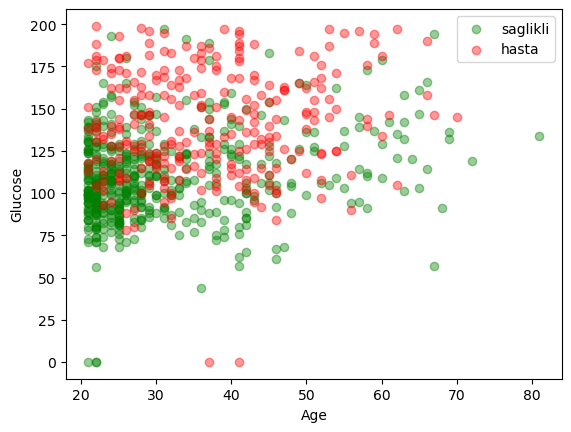

In [33]:
plt.scatter(saglikliInsanlar.Age, saglikliInsanlar.Glucose, color="green",label="saglikli" ,alpha=0.4)
plt.scatter(sekerHastalari.Age, sekerHastalari.Glucose, color="red",label="hasta", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [34]:
y = data.Outcome.values # y-> bagimli değişken hasta mı degil mi
x_ham = data.drop(["Outcome"], axis=1) # outcome u çıkardık, outcom hariç hepsini almış olduk



In [58]:
## normalizasyon yaptım
x = (x_ham - np.min(x_ham)) / (np.max(x_ham)-np.min(x_ham))

In [59]:
print("normalizasyon öncesi veriler: \n")
print(x_ham.head())
print("normalizasyon sonrası veriler: \n")
print(x.head())

normalizasyon öncesi veriler: 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
normalizasyon sonrası veriler: 

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.007092  0.174941       0.085106       0.041371  0.000000  0.039716   
1     0.001182  0.100473       0.078014       0.034279  0.000000  0.031442   
2     0.009456  0.216312       0.075650       0.000000  0.

In [37]:
correlation_matrix = data.corr()

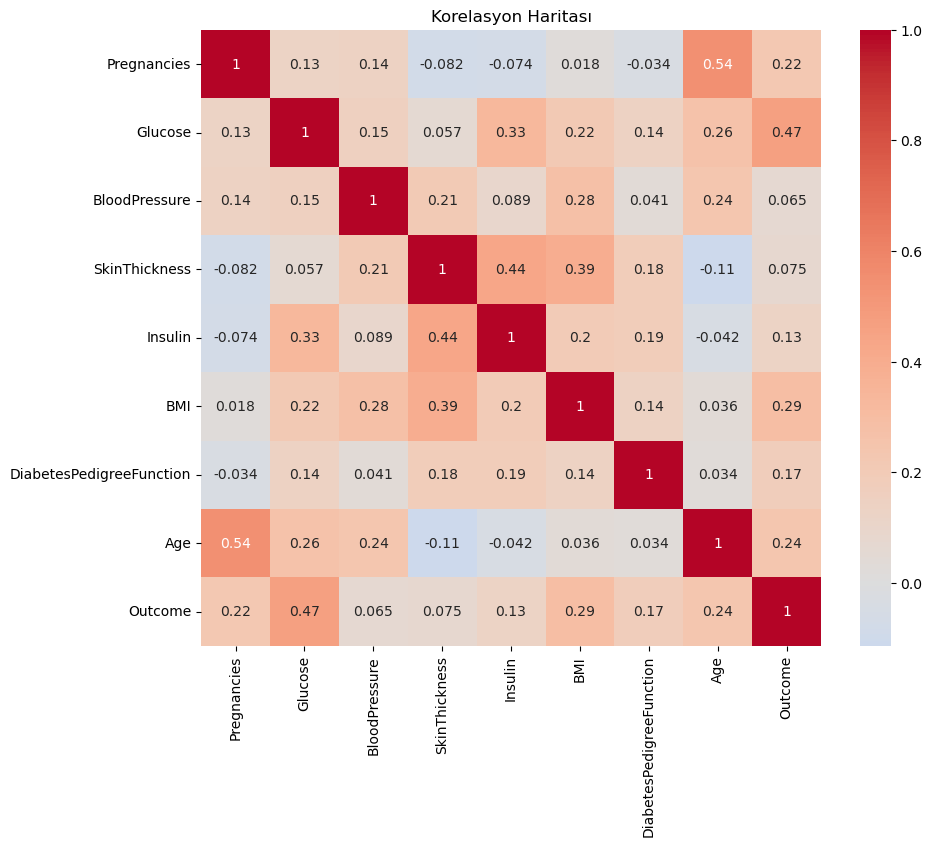

In [38]:
plt.figure(figsize=(10, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasyon Haritası')
plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [79]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [97]:
modelKnn=KNeighborsClassifier(n_neighbors=10)
modelKnn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [98]:
prediction=modelKnn.predict(x_test)

In [99]:
print("k=3 için scor :")
modelKnn.score(x_test,y_test)

k=3 için scor :


0.7792207792207793

In [100]:
print("hangi k degeri için en iyi sonucu alırız :")
sayac=1
for k in range(1,11):
    yeni_modelKnn=KNeighborsClassifier(n_neighbors=k)
    yeni_modelKnn=yeni_modelKnn.fit(x_train,y_train)
    sayac += 1
    print(k, yeni_modelKnn.score(x_test,y_test))
    


hangi k degeri için en iyi sonucu alırız :
1 0.6948051948051948
2 0.7662337662337663
3 0.7402597402597403
4 0.7467532467532467
5 0.7272727272727273
6 0.7662337662337663
7 0.7532467532467533
8 0.7727272727272727
9 0.7662337662337663
10 0.7792207792207793


In [84]:
# en iyi skor k=10

In [122]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.007092,0.174941,0.085106,0.041371,0.000000,0.039716,0.000741,0.059102
1,0.001182,0.100473,0.078014,0.034279,0.000000,0.031442,0.000415,0.036643
2,0.009456,0.216312,0.075650,0.000000,0.000000,0.027541,0.000794,0.037825
3,0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823
4,0.000000,0.161939,0.047281,0.041371,0.198582,0.050946,0.002704,0.039007


In [136]:
def predict(var1, var2, var3, var4,var5,var6,var7,var8):
    input_data = [var1, var2, var3, var4,var5,var6,var7,var8]
    prediction = modelKnn.predict([input_data])
    return prediction[0]

In [137]:
predict(0.001182,0.105201,0.078014,0.027187,0.111111,0.033215,0.000197,0.024823)

/Users/zeynepsudeozturk/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0